In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [9]:
df = pd.read_csv("data\Group2-311DataPreCOVID-Cold Season.csv").drop("Unnamed: 0", axis=1)
df

CASEID              ADDRESS                       NEIGH  \
0      2020030934      3401 Troost Ave                 Center City   
1      2020030899       3200 Wayne Ave  Linwood Homeowners-Ivanhoe   
2      2020030938   5126 N Topping Ave             Maple Park West   
3      2020030842    5002 NE Parvin Rd               Holiday Hills   
4      2020030883      5151 E Front St                         NaN   
...           ...                  ...                         ...   
52783  2019159516  1009 W Santa Fe Trl          Blue Hills Estates   
52784  2019159514  1112 W Santa Fe Trl                Verona Hills   
52785  2019159519    5859 N Oakley Ave          Ravenwood-Somerset   
52786  2019159532     6301 College Ave           Swope Park Campus   
52787  2019159544      6717 N Holly St                     Clayton   

      NEIGH-Income      ZIP      POLICED  COUNCILD SOURCE  Sum SOURCE   \
0                M  64109.0      Central       3.0  PHONE        30436   
1                M  64109.0      Central       3.0  PHONE        30436   
2                M  64119.0  Shoal Creek       1.0  PHONE        30436   
3                M  64117.0  Shoal Creek       1.0    WEB        13543   
4              NaN  64120.0         East       4.0  PHONE        30436   
...            ...      ...          ...       ...    ...          ...   
52783            H  64145.0        South       6.0    WEB        13543   
52784            H  64145.0        South       6.0    WEB        13543   
52785            H  64119.0  Shoal Creek       1.0    WEB        13543   
52786            M  64132.0        Metro       5.0    WEB        13543   
52787            M  64118.0        North       2.0    WEB        13543   

                          CATEGORY  ...   CLOSEDATE  CLOSEMO  CLOSEYR  \
0                 Capital Projects  ...   3/17/2020      3.0   2020.0   
1                       Government  ...    4/2/2020      4.0   2020.0   
2                 Lights / Signals  ...    3/4/2020      3.0   2020.0   
3                 Lights / Signals  ...    3/3/2020      3.0   2020.0   
4                 Lights / Signals  ...    3/2/2020      3.0   2020.0   
...                            ...  ...         ...      ...      ...   
52783  Streets / Roadways / Alleys  ...    9/6/2019      9.0   2019.0   
52784            Trash / Recycling  ...   9/11/2019      9.0   2019.0   
52785            Trash / Recycling  ...  12/12/2019     12.0   2019.0   
52786            Trash / Recycling  ...    9/6/2019      9.0   2019.0   
52787            Trash / Recycling  ...   9/12/2019      9.0   2019.0   

      DAYTOCLOSE.1                                            ADDGEOC  \
0             17.0      3401 Troost Ave64109\n(39.064784, -94.571274)   
1             33.0       3200 Wayne Ave64109\n(39.067575, -94.565052)   
2              4.0    5126 N Topping Ave64119\n(39.18713, -94.512266)   
3              3.0     5002 NE Parvin Rd64117\n(39.16734, -94.520987)   
4              2.0      5151 E Front St64120\n(39.130275, -94.519215)   
...            ...                                                ...   
52783          5.0  1009 W Santa Fe Trl64145\n(38.906285, -94.606155)   
52784         10.0  1112 W Santa Fe Trl64145\n(38.906954, -94.607595)   
52785        102.0    5859 N Oakley Ave64119\n(39.201411, -94.513576)   
52786          5.0     6301 College Ave64132\n(39.011947, -94.547709)   
52787         11.0       6717 N Holly St64118\n(39.215996, -94.59353)   

        COUNTY   Latitude  Longitude     APN  \
0      Jackson  39.064784 -94.571274  125710   
1      Jackson  39.067575 -94.565052  125505   
2         Clay  39.187130 -94.512266   81323   
3         Clay  39.167340 -94.520987   76717   
4      Jackson  39.130275 -94.519215   38507   
...        ...        ...        ...     ...   
52783  Jackson  38.906285 -94.606155  156615   
52784  Jackson  38.906954 -94.607595  156673   
52785     Clay  39.201411 -94.513576   90077   
52786  Jackson  39.011947 -94.547709    1558   

In [56]:
geo = df[["NEIGH-Income", "Latitude", "Longitude"]].dropna()
sns.set(style="darkgrid", font="Arial", font_scale=1.5)

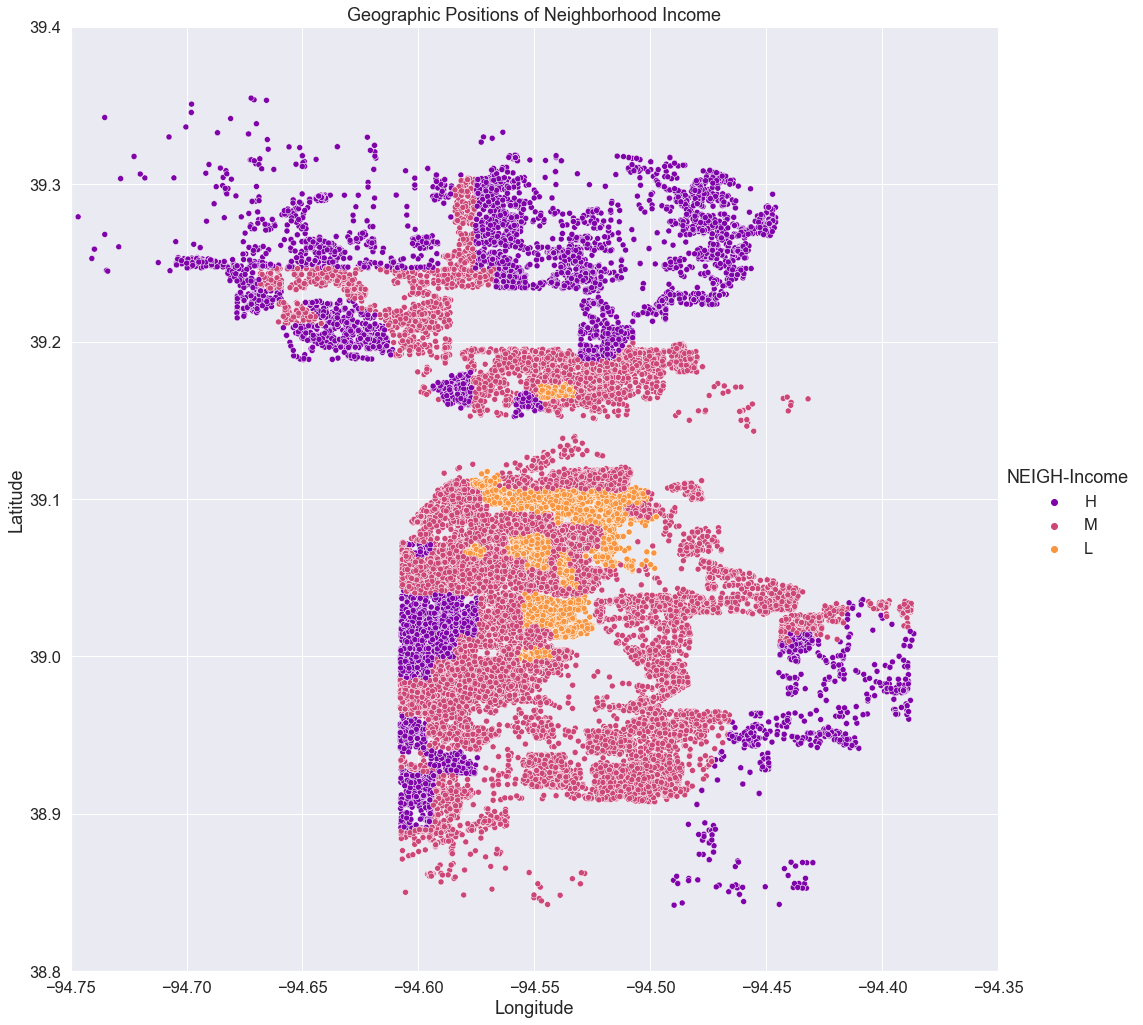

In [55]:
sns.relplot(x='Longitude', y='Latitude', hue="NEIGH-Income", hue_order=["H", "M", "L"], data=geo, 
            palette="plasma", height=14)
plt.xlim(-94.75, -94.35), plt.ylim(38.8, 39.4), plt.title("Geographic Positions of Neighborhood Income")
plt.savefig("graphics\GeoIncome.jpg")

# I. Source

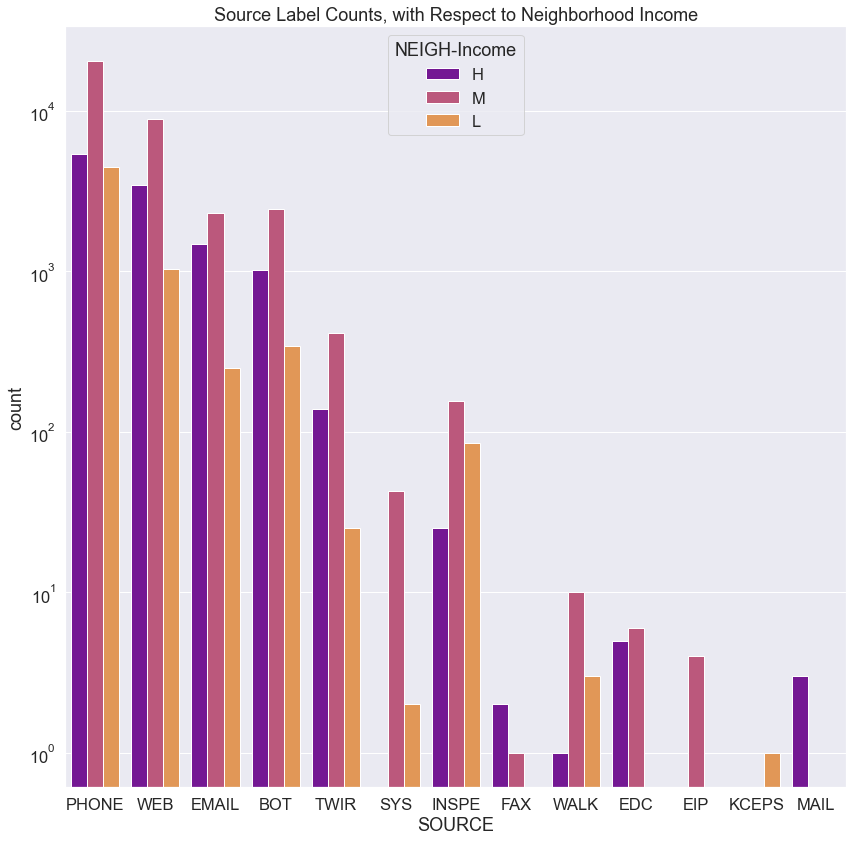

In [51]:
fig, ax = plt.subplots(figsize=(14, 14))
g = sns.countplot(x='SOURCE', hue='NEIGH-Income', data=df, palette="plasma", hue_order=["H", "M", "L"])
plt.title("Source Label Counts, with Respect to Neighborhood Income")
g.set_yscale("log")
plt.savefig('graphics\SourceCounts.jpg')

In [57]:
H = pd.read_csv("data\H-Group2-311DataPreCOVID-Cold Season.csv")
vsH = H["SOURCE"].value_counts().to_frame()
px.pie(vsH, values='SOURCE', names=vsH.index, title="Source Distribution among High Income Neighborhoods").show()

In [58]:
M = pd.read_csv("data\M-Group2-311DataPreCOVID-Cold Season.csv")
vsM = M["SOURCE"].value_counts().to_frame()
px.pie(vsM, values='SOURCE', names=vsM.index, title="Source Distribution among Medium Income Neighborhoods").show()

In [59]:
L = pd.read_csv("data\L-Group2-311DataPreCOVID-Cold Season.csv")
vsL = L["SOURCE"].value_counts().to_frame()
px.pie(vsL, values='SOURCE', names=vsL.index, title="Source Distribution among Low Income Neighborhoods").show()

As we move from High to Medium, then Low-Income neighborhoods, the proportion of SOURCE comming from PHONE increases, while WEB, BOT, and EMAIL decreases. 

In [79]:
vcH = H["CATEGORY"].value_counts().to_frame()
fig4 = px.bar(vcH, title="Call Categories in High Income Neighborhoods", labels={"value": "Occurences", "index": "Label"}, 
              log_y=True)
fig4.update_layout(showlegend=False).show()

In [82]:
vcM = M["CATEGORY"].value_counts().to_frame()
fig5 = px.bar(vcM, title="Call Categories in Moderate Income Neighborhoods", labels={"value": "Occurences", "index": "Label"}, 
              log_y=True)
fig5.update_layout(showlegend=False).show()

In [85]:
vcL = L["CATEGORY"].value_counts().to_frame()
fig6 = px.bar(vcL, title="Call Categories in Low Income Neighborhoods", labels={"value": "Occurences", "index": "Label"}, 
              log_y=True)
fig6.update_layout(showlegend=False).show()